**Aim :** To implement K-Means clustering using scikit-learn library for unlabeled and labeled data.

**Excercise:** Write a python program to perform K-Means clustering on Breast Cancer Data

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Prepare Data**

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


**K-Mean Model**

In [8]:
kmeans = KMeans(n_clusters=10, random_state=115)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[5 5 1 0 1 7 1 7 7 7 3 6 6 3 7 3 3 6 9 7 0 4 3 9 5 6 7 6 6 6 1 7 6 5 6 6 7
 0 7 7 7 0 1 7 7 1 4 7 0 7 0 7 0 6 3 0 5 3 0 4 4 4 3 4 7 3 4 0 4 0 5 4 1 7
 0 6 0 1 1 0 0 0 2 6 0 1 7 1 0 7 7 7 7 7 3 5 0 4 0 7 7 4 0 4 4 7 0 0 9 0 4
 0 7 4 4 0 4 3 6 6 0 1 9 7 0 7 7 1 7 1 0 3 6 3 1 0 0 0 3 4 4 6 0 0 4 0 0 7
 7 7 0 4 4 4 7 0 6 3 0 0 0 1 9 0 9 7 4 6 1 7 0 3 3 4 4 4 4 3 0 0 2 5 6 0 3
 4 6 0 0 0 7 0 4 7 7 0 7 6 1 3 0 6 9 3 0 3 4 6 0 3 1 0 2 3 7 7 0 4 5 9 7 7
 4 3 7 7 4 7 0 7 6 0 0 5 4 7 2 5 7 6 7 0 0 7 1 4 0 0 4 0 5 0 5 6 5 7 5 3 6
 3 5 6 6 3 6 2 4 7 0 4 7 0 9 4 6 0 0 6 7 7 1 0 1 3 0 0 0 0 4 0 7 7 0 0 0 7
 4 0 7 4 5 0 1 4 0 0 0 4 7 7 0 7 0 0 4 0 0 1 4 0 4 1 0 5 0 0 7 0 3 3 3 0 4
 0 0 6 0 5 4 2 7 4 4 1 0 4 0 7 0 0 0 3 2 3 0 0 0 7 4 4 0 0 0 3 7 5 1 0 2 9
 6 7 1 5 7 3 4 7 7 0 0 4 0 0 0 7 0 7 0 6 4 4 6 9 0 7 7 0 0 0 6 0 0 0 0 0 3
 0 6 0 0 0 4 7 3 0 4 1 0 0 0 7 0 7 4 4 4 0 4 0 7 0 1 1 7 7 0 7 7 7 0 6 7 4
 6 0 6 7 7 5 0 1 0 7 0 7 0 0 0 4 1 8 7 0 7 7 7 4 6 0 4 0 3 0 4 0 7 7 0 3 0
 7 7 7 3 0 7 1 0 3 0 6 6 

**Scatter plot of the data points**

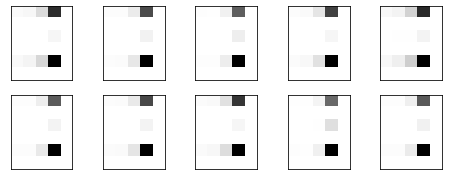

In [9]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [10]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9086115992970123

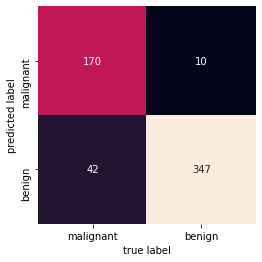

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');